<a href="https://colab.research.google.com/github/Crisisty/rag/blob/main/multi_pdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install langchain_unstructured unstructured[all-docs] pypdf PyMuPDF html2text

In [1]:
from langchain_unstructured import UnstructuredLoader

file_path = "0.LangChain技术生态介绍.pdf"

loader_local = UnstructuredLoader(
    file_path=file_path,
    strategy="hi_res",              # 高分辨率模式，支持复杂文档
    infer_table_structure=True,     # 自动解析表格结构
    ocr_languages="chi_sim+eng",    # 支持中英文 OCR
    ocr_engine="paddleocr"          # 指定 PaddleOCR 作为 OCR 引擎
)

docs_local = []
for doc in loader_local.lazy_load():
    docs_local.append(doc)

docs_local

yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/367 [00:00<?, ?it/s]

[Document(metadata={'source': '0.LangChain技术生态介绍.pdf', 'detection_class_prob': 0.5096848011016846, 'is_extracted': 'true', 'coordinates': {'points': ((np.float64(362.15278337696674), np.float64(191.87550354003906)), (np.float64(362.15278337696674), np.float64(334.06414794921875)), (np.float64(2483.303311344374), np.float64(334.06414794921875)), (np.float64(2483.303311344374), np.float64(191.87550354003906))), 'system': 'PixelSpace', 'layout_width': 2897, 'layout_height': 4098}, 'last_modified': '2026-02-25T05:34:10', 'filetype': 'application/pdf', 'languages': ['zho', 'eng'], 'page_number': 1, 'filename': '0.LangChain技术生态介绍.pdf', 'category': 'Title', 'element_id': 'ece6fcf6033302b1b2728408dd91dd70'}, page_content='LangChain快速入门与Agent开发实战-Part'),
 Document(metadata={'source': '0.LangChain技术生态介绍.pdf', 'is_extracted': 'true', 'coordinates': {'points': ((np.float64(362.15278337696674), np.float64(345.0878619346522)), (np.float64(362.15278337696674), np.float64(451.7284893162924)), (np.floa

In [2]:
import fitz
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from PIL import Image


def plot_pdf_with_boxes(pdf_page, segments):
    pix = pdf_page.get_pixmap()
    pil_image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(pil_image)
    categories = set()
    category_to_color = {
        "Title": "orchid",
        "Image": "forestgreen",
        "Table": "tomato",
    }
    for segment in segments:
        points = segment["coordinates"]["points"]
        layout_width = segment["coordinates"]["layout_width"]
        layout_height = segment["coordinates"]["layout_height"]
        scaled_points = [
            (x * pix.width / layout_width, y * pix.height / layout_height)
            for x, y in points
        ]
        box_color = category_to_color.get(segment["category"], "deepskyblue")
        categories.add(segment["category"])
        rect = patches.Polygon(
            scaled_points, linewidth=1, edgecolor=box_color, facecolor="none"
        )
        ax.add_patch(rect)

    # Make legend
    legend_handles = [patches.Patch(color="deepskyblue", label="Text")]
    for category in ["Title", "Image", "Table"]:
        if category in categories:
            legend_handles.append(
                patches.Patch(color=category_to_color[category], label=category)
            )
    ax.axis("off")
    ax.legend(handles=legend_handles, loc="upper right")
    plt.tight_layout()
    plt.show()


def render_page(doc_list: list, page_number: int, print_text=True) -> None:
    pdf_page = fitz.open(file_path).load_page(page_number - 1)
    page_docs = [
        doc for doc in doc_list if doc.metadata.get("page_number") == page_number
    ]
    segments = [doc.metadata for doc in page_docs]
    plot_pdf_with_boxes(pdf_page, segments)
    if print_text:
        for doc in page_docs:
            print(f"{doc.page_content}\n")

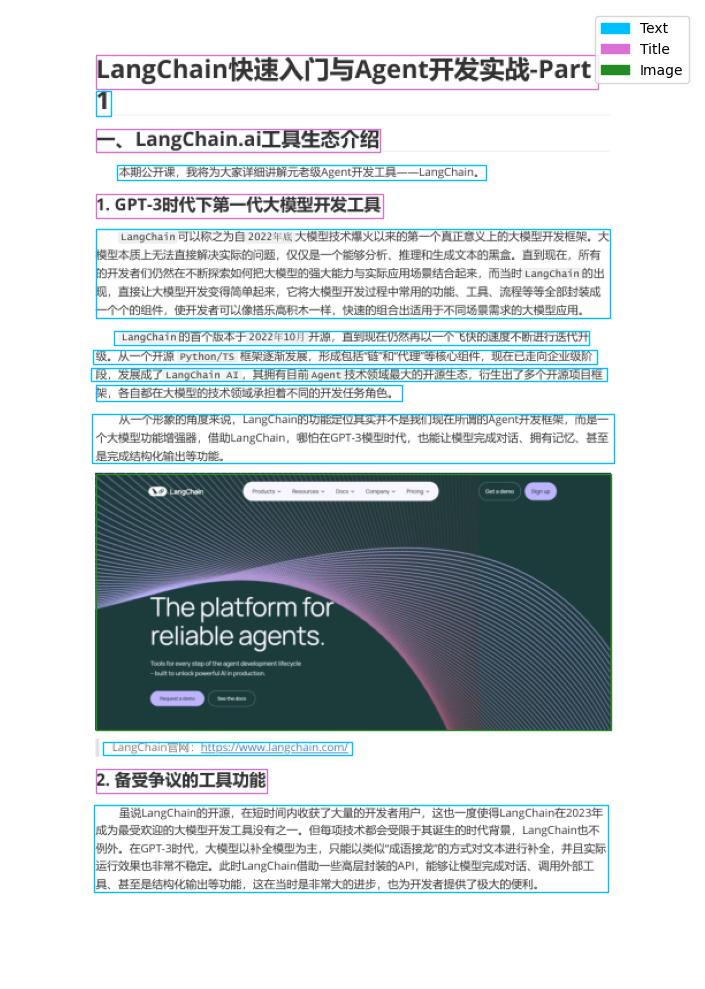

LangChain快速入门与Agent开发实战-Part

1

一、LangChain.ai工具生态介绍

本期公开课，我将为大家详细讲解元老级Agent开发工具——LangChain。

1. GPT-3时代下第一代大模型开发工具

LangChain 可以称之为自 2022年底 大模型技术爆火以来的第一个真正意义上的大模型开发框架。大 模型本质上无法直接解决实际的问题，仅仅是一个能够分析、推理和生成文本的黑盒。直到现在，所有 的开发者们仍然在不断探索如何把大模型的强大能力与实际应用场景结合起来，而当时 LangChain 的出 现，直接让大模型开发变得简单起来，它将大模型开发过程中常用的功能、工具、流程等等全部封装成 一个个的组件，使开发者可以像搭乐高积木一样，快速的组合出适用于不同场景需求的大模型应用。

LangChain 的首个版本于 2022年10月 开源，直到现在仍然再以一个飞快的速度不断进行迭代升

级。从一个开源 Python/TS 框架逐渐发展，形成包括“链”和“代理”等核心组件，现在已走向企业级阶

段，发展成了 LangChain AI ，其拥有目前 Agent 技术领域最大的开源生态，衍生出了多个开源项目框

架，各自都在大模型的技术领域承担着不同的开发任务角色。

从一个形象的角度来说，LangChain的功能定位其实并不是我们现在所谓的Agent开发框架，而是一 个大模型功能增强器，借助LangChain，哪怕在GPT-3模型时代，也能让模型完成对话、拥有记忆、甚至 是完成结构化输出等功能。

(40) LangChain roducts v jocs ¥ = Company vy _— Pricing v ine platform for reliable agents. Tools for every step of the agent development lifecycle — built to unlock powerful Al in production. Request a demo See the docs

LangChain官网：https://www.langchain.com/

2. 备受争议的工具功能

虽说LangChain的开源，在短时间内收获了大量的开发者用户，这也一度使得LangChain在20

In [3]:
render_page(docs_local, 1)

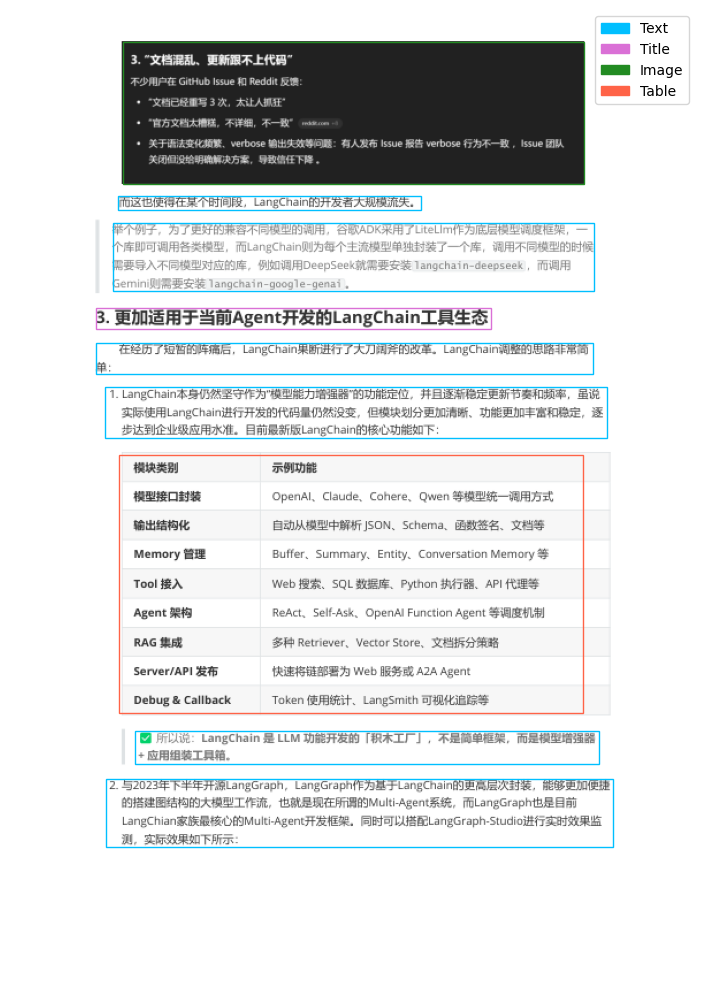

Cee 4 fit Fi ee 7R/D FAP GitHub Issue 4] Reddit zis: CDS | et a= =U) OU GAA) | ole C "BRAMMER, AA, A reddit.com CI on =p ty 6 Ose OLR La wes] SU =A 2A AUC RE amd LOS OS Ses OC pie bpre-a]') 5] 33) 2y Oe Gate al ae

而这也使得在某个时间段，LangChain的开发者大规模流失。

举个例子，为了更好的兼容不同模型的调用，谷歌ADK采用了LiteLlm作为底层模型调度框架，一 个库即可调用各类模型，而LangChain则为每个主流模型单独封装了一个库，调用不同模型的时候 需要导入不同模型对应的库，例如调用DeepSeek就需要安装 langchain-deepseek ，而调用 Gemini则需要安装 langchain-google-genai 。

3. 更加适用于当前Agent开发的LangChain工具生态

在经历了短暂的阵痛后，LangChain果断进行了大刀阔斧的改革。LangChain调整的思路非常简 单：

1. LangChain本身仍然坚守作为“模型能力增强器”的功能定位，并且逐渐稳定更新节奏和频率，虽说 实际使用LangChain进行开发的代码量仍然没变，但模块划分更加清晰、功能更加丰富和稳定，逐 步达到企业级应用水准。目前最新版LangChain的核心功能如下：

模块类别 示例功能 模型接口封装 OpenAI、Claude、Cohere、Qwen 等模型统一调用方式 输出结构化 自动从模型中解析 JSON、Schema、函数签名、文档等 Memory 管理 Buffer、Summary、Entity、Conversation Memory 等 Tool 接入 Web 搜索、SQL 数据库、Python 执行器、API 代理等 Agent 架构 ReAct、Self-Ask、OpenAI Function Agent 等调度机制 RAG 集成 多种 Retriever、Vector Store、文档拆分策略 Server/API 发布 快速将链部署为 Web 服务或 A2A Agent Debug & Callback Token 

In [4]:
render_page(docs_local, 3)

In [5]:
from IPython.display import HTML,display

segments = [
    doc.metadata
    for doc in docs_local
    if doc.metadata.get("page_number") == 3 and doc.metadata.get("category") == "Table"
]

display(HTML(segments[0]["text_as_html"]))

IRR,7 IINBE
RBEOAR,"OpenAl, Claude, Cohere, Qwen Sa!4%%—ia asst"
fhetate,"Ea Mie PRRAT ISON, Schema, PRBNSSR. SOE"
Memory B#,"Buffer, Summary, Entity, Conversation Memory &"
Tool A,Web #82. SQL 2uHBe. Python 4th. API (EES
Agent 2249,"ReAct, Self-Ask, OpenAl Function Agent Sia EW Lill"
RAG S hk,"FH Retriever, Vector Store, 3CR4SIRA RRS"
Server/API 2275,RRGHEBEA Web Asa A2A Agent
Debug & Callback,"Token (Feit, LangSmith Ay @tiBinS"


In [8]:
import os
import fitz
from unstructured.partition.pdf import partition_pdf

pdf_path = "0.LangChain技术生态介绍.pdf"
output_dir = "pdf_images"
os.makedirs(output_dir, exist_ok=True)

# Step 1: 提取文本/结构化内容
elements = partition_pdf(
    filename=pdf_path,
    infer_table_structure=True,   # 开启表格结构检测
    strategy="hi_res",            # 高分辨率 OCR，适合复杂表格
    ocr_languages="chi_sim+eng",  # 中英文混合识别
    ocr_engine="paddleocr"        # 指定 PaddleOCR 引擎
)

# Step 2: 提取图片并保存
doc = fitz.open(pdf_path)
image_map = {}  # 映射 page_num -> list of image paths

for page_num, page in enumerate(doc, start=1):
    image_map[page_num] = []
    for img_index, img in enumerate(page.get_images(full=True), start=1):
        xref = img[0]
        pix = fitz.Pixmap(doc, xref)
        img_path = os.path.join(output_dir, f"page{page_num}_img{img_index}.png")
        if pix.n < 5:  # RGB / Gray
            pix.save(img_path)
        else:  # CMYK 转 RGB
            pix = fitz.Pixmap(fitz.csRGB, pix)
            pix.save(img_path)
        image_map[page_num].append(img_path)

# Step 3: 转换为 Markdown
md_lines = []
inserted_images = set()  # 用来记录已经插入过的图片，避免重复

for el in elements:
    cat = el.category
    text = el.text
    page_num = el.metadata.page_number

    if cat == "Title" and text.strip().startswith("- "):
        md_lines.append(text + "\n")
    elif cat == "Title":
        md_lines.append(f"# {text}\n")
    elif cat in ["Header", "Subheader"]:
        md_lines.append(f"## {text}\n")
    elif cat == "Table":
        if hasattr(el.metadata, "text_as_html") and el.metadata.text_as_html:
            from html2text import html2text
            md_lines.append(html2text(el.metadata.text_as_html) + "\n")
        else:
            md_lines.append(el.text + "\n")
    elif cat == "Image":
        # 避免重复插入：只插入当前图片对应的文件
        for img_path in image_map.get(page_num, []):
            if img_path not in inserted_images:
                md_lines.append(f"![Image](./{img_path})\n")
                inserted_images.add(img_path)
    else:
        md_lines.append(text + "\n")

# Step 4: 写入 Markdown 文件
output_md = "output.md"
with open(output_md, "w", encoding="utf-8") as f:
    f.write("\n".join(md_lines))

print(f"✅ 转换完成，已生成 {output_md} 和 {output_dir}/ 图片文件夹")

✅ 转换完成，已生成 output.md 和 pdf_images/ 图片文件夹
